UVP SEMINARSKA NALOGA - LINA ČIŽMAN

ANALIZA PREHRANSKIH DODATKOV NA SPLETNI STRANI FUTUNATURA

Pripravila sem seminarsko nalogo, v kateri sem analizirala prehranske dodatke, ki so na voljo na spletni strani Futunatura. Ker je na spletni strani več kategorij sem se odločila, da svojo analizo omejim na eno podkategorijo. Odločila sem se za podkategorijo Športa, ki mi je osebno najbljižje.
V tej podkategoriji mi je uspelo pridobiti podatke o 646 različnih izdelkih 6 atributov. Vsak izdelek vsebuje podatke o imenu, znamki proizvajalca, količini, ceni, originalni ceni in popustu (če je izdelek na razprodaji) ter o prednostih izdelka(to je tabela ki vsebuje 3 prednosti izdelka). V podatkih je največji problem v tem da je količina določena na nestandarden način. enkrat v gramih, drugič v številu kapsul spet tretjič pa kot število enot x količina in podobno. Precej ne standardiziran je tudi zapis prednosti izdelka. na primer če sta dva izdelka namenjena za hidracijo bo pri enem pisalo podpora hidraciji pri drugem pa napitek za več energije. Iz tega razloga je združevanje podatkov v skupine po teh parametrih precej oteženo. 
Pri analizi sem poizkušala poiskati zanimive vzorce v podatkih in jih prikazati na čim boljši način v obliki grafikonov in drugih vizualizacije ki sem jih kreirala s pomočjo knjižnic kot so pandas in matplotlib. 

Najprej sem ugotvila analizirala število ponudnikov športnih prehranskih dodatkov na spletni strani futunatura in pa to kateri ponudniki so v povprečju dražji in kateri cenejši. v spodnji tabeli lahko vidimo seznam posameznih ponudnikov in pa povprečno ceno izdelkov ki jih trenutno ponujajo na spletni strani. 10 najdražjih in 10 najcenejših ponudnikov sem nato prikazala še s pomočjo stolpičnega diagrama. Kot lahko vidimo na rezultatih spodaj je razlika med povprečno ceno najdražjega in najcenejšega ponudnika kar velika in znaša 42,58 eur.

NAJDRAŽJI PONUDNIKI
ALIVER Nutraceutics: 45.99€
Ekolife Natura: 34.99€
Activevital: 34.99€
OnEnergy: 31.19€
Erefit®: 30.74€
HealthyWorld®: 30.05€
ProFuel: 26.64€
Focus Supplements: 25.32€
Annabis: 24.74€
Vita World: 24.17€
--------------------------------
NAJCENEJŠI PONUDNIKI
Diet Food: 13.32€
Genius Nutrition: 12.91€
Allgäuer: 11.99€
QNT: 11.45€
Dragon Superfoods: 10.99€
Virde: 10.68€
NatVita: 9.32€
ActivLab: 8.58€
WUNDmed: 6.99€
Smart Organic: 3.41€


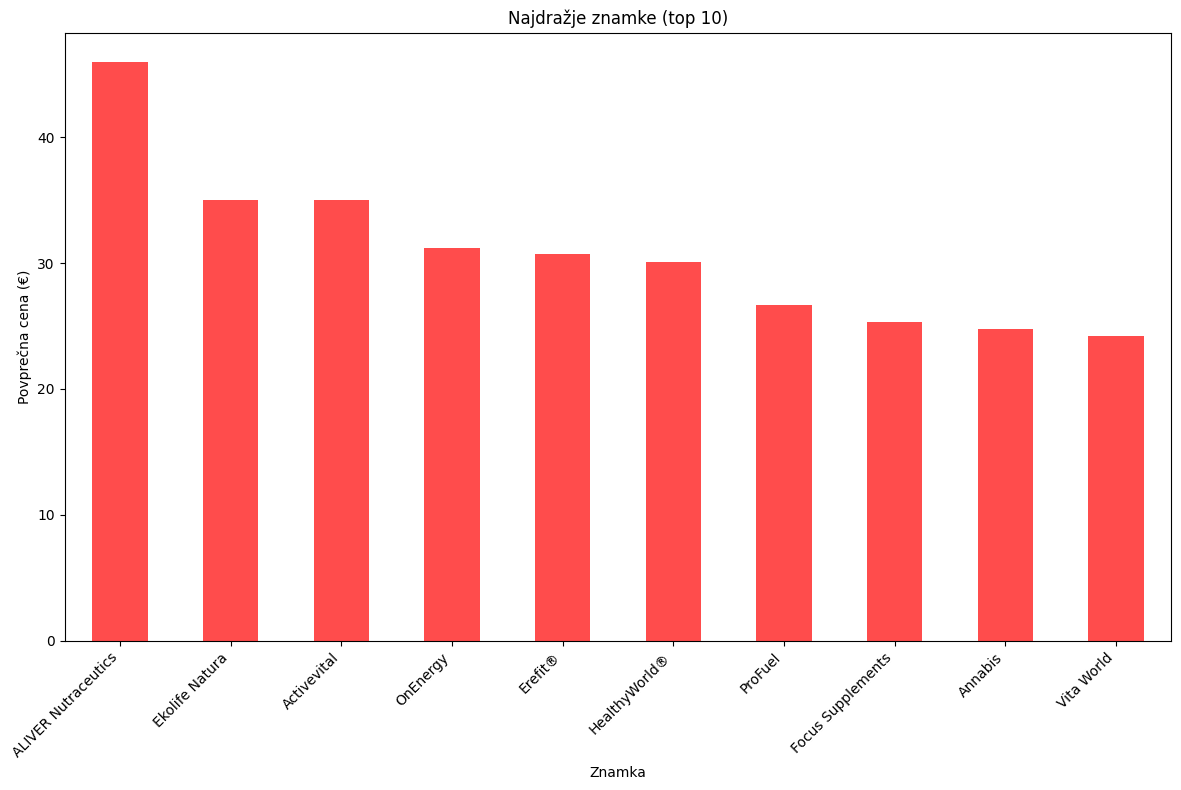

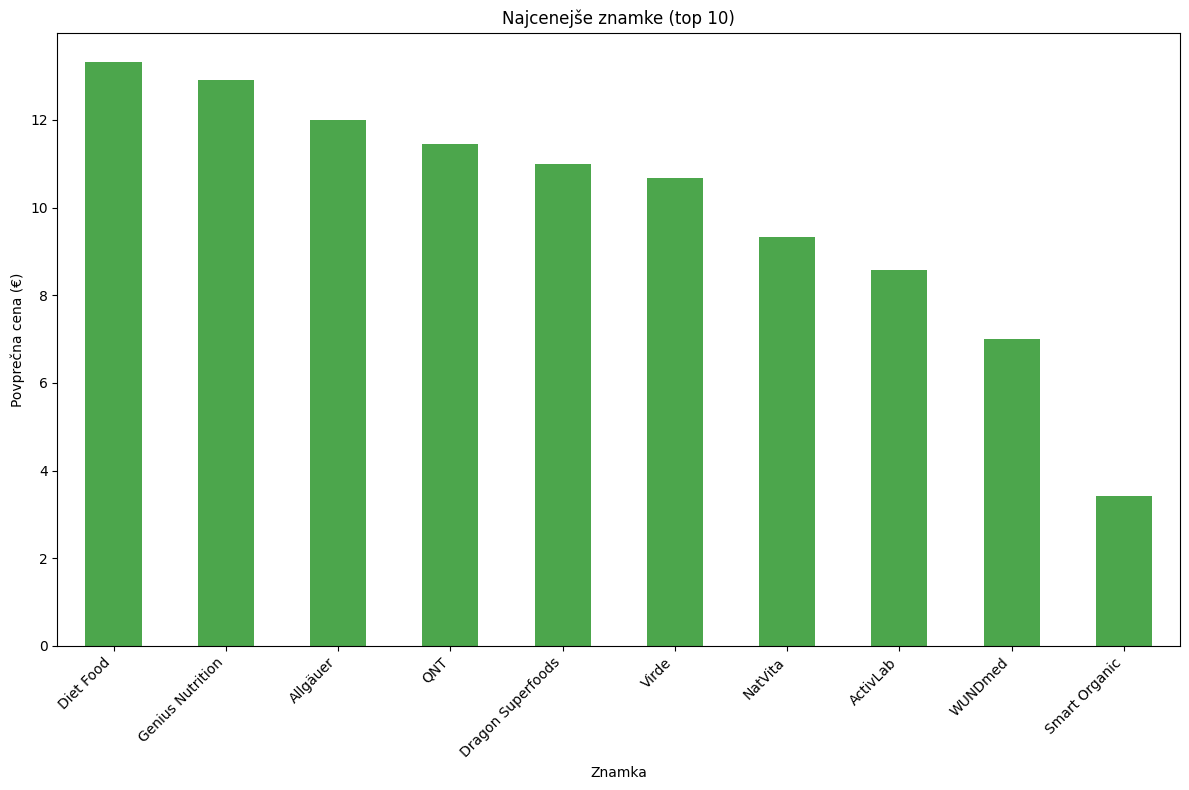

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
def povprecne_cene_po_znamkah():
    # Preberi podatke
    df = pd.read_csv('podatki_o_vseh_izdelki.csv')
    # Odstrani € iz cen in pretvori v številke
    df['Cena'] = df['Cena'].str.replace(' €', '').astype(float)
    # Grupiraj po znamki in izračunaj povprečje
    povprecja = df.groupby('Znamka')['Cena'].mean().round(2).sort_values(ascending=False)
    return povprecja

# Pokliči funkcijo
rezultat = povprecne_cene_po_znamkah()
najdrazji = rezultat.head(10)
najcenejsi = rezultat.tail(10)
print("NAJDRAŽJI PONUDNIKI")
for znamka, cena in najdrazji.items():
    print(f"{znamka}: {cena}€")
print("--------------------------------")
print("NAJCENEJŠI PONUDNIKI")
for znamka, cena in najcenejsi.items():
    print(f"{znamka}: {cena}€")

# Vizualizacija - top 10 najdražjih znamk
plt.figure(figsize=(12, 8))
top_10 = rezultat.head(10)
top_10.plot(kind='bar', color='red', alpha=0.7)
plt.title('Najdražje znamke (top 10)')
plt.xlabel('Znamka')
plt.ylabel('Povprečna cena (€)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Vizualizacija - top 10 najcenejših znamk
plt.figure(figsize=(12, 8))
bottom_10 = rezultat.tail(10)
bottom_10.plot(kind='bar', color='green', alpha=0.7)
plt.title('Najcenejše znamke (top 10)')
plt.xlabel('Znamka')
plt.ylabel('Povprečna cena (€)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
  

Nato sem ponudnike na spletni strani razdelila v tri kategorije glede na povprečno ceno njihovih izdelkov. to sem naredila tako da sem seznam ponudnikov in njihovih povprečnih cen urejenih padajoče razdelila na tri dele in dobila: cenejši, srednji, višji cenovni nivo ponudnikov. not sem med vsemi izdelki preštela koliko jih pripada ponudnikom višjega cenovnega razreda, koliko srednjega in koliko nižjega cenovnega razreda. ko sem imela vse te podatke pa sem izračunala tržni delež posameznega cenovnega razreda ponudnikov in to prikazala v tortnem diagramu. 
Kot se izkaže se tržni deleži na spletni strani restejo glede na višino cenovnega razreda pri čemer ima najnižji cenovni razred najmanjši delež na trgu, srednji srednji delež in pa najvišji cenovni razred največji delež na trgu.

DELEŽI NA TRGU GLEDE NA CENOVNI NIVO PONUDNIKA
Najdražji ponudniki: 41.71%
Srednji ponudniki: 34.88%
Najcenejši ponudniki: 23.41%


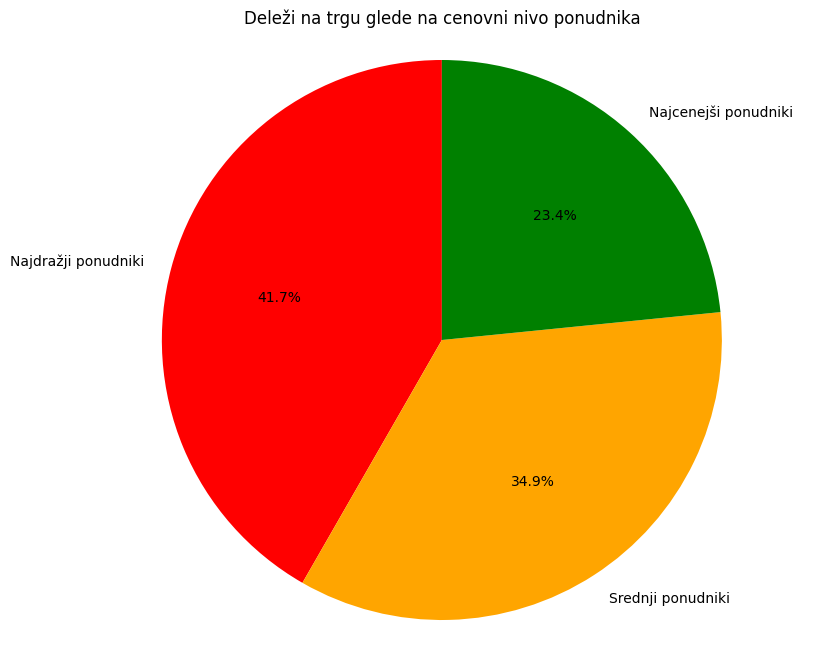

In [3]:
podatki = pd.read_json('podatki_o_vseh_izdelki.json')
število_izdelkov = len(podatki)
število_ponudnikov = len(rezultat)
tretjina = število_ponudnikov // 3
drazji_ponudniki = rezultat[0:tretjina]
srednji_ponudniki = rezultat[tretjina:2*tretjina]
cenejsi_ponudniki = rezultat[2*tretjina:]

št_drazjih = 0
št_srednjih = 0
št_cenejših = 0

for ponudnik, cena in drazji_ponudniki.items():
    št_drazjih += len(podatki[podatki['znamka'] == ponudnik])
for ponudnik, cena in srednji_ponudniki.items():
    št_srednjih += len(podatki[podatki['znamka'] == ponudnik])
for ponudnik, cena in cenejsi_ponudniki.items():
    št_cenejših += len(podatki[podatki['znamka'] == ponudnik])
delezi = [št_drazjih/število_izdelkov, št_srednjih/število_izdelkov, št_cenejših/število_izdelkov]

print("DELEŽI NA TRGU GLEDE NA CENOVNI NIVO PONUDNIKA")
print(f"Najdražji ponudniki: {delezi[0]:.2%}")
print(f"Srednji ponudniki: {delezi[1]:.2%}")
print(f"Najcenejši ponudniki: {delezi[2]:.2%}")

# Tortni diagram
plt.figure(figsize=(10, 8))
kategorije = ['Najdražji ponudniki', 'Srednji ponudniki', 'Najcenejši ponudniki']
barve = ['red', 'orange', 'green']

plt.pie(delezi, labels=kategorije, colors=barve, autopct='%1.1f%%', startangle=90)
plt.title('Deleži na trgu glede na cenovni nivo ponudnika')
plt.axis('equal')  # Da bo torta krožna
plt.show()



Na strani imamo kar nekaj izdelkov ki imajo trenutno popust. Pri naslednjem delu analize sem poiskala nekaj zanimivih podatkov v zvezi s popusti na spletni strani. Najprej sem pripravila seznam ponudnikov ki na spletni strani ponujajo popuste in jih uredila po velikosti od največjega do najmanjšega in prikazala prvih 10 ponudnikov z najvišjim povprečnim popustom ki ga ponujajo.

In [4]:
def povprecni_popusti_po_znamkah():
    # Preberi podatke
    df = pd.read_csv('podatki_o_vseh_izdelki.csv')
    # Odstrani vrstice brez popusta
    df = df.dropna(subset=['Popust'])
    # Odstrani % iz popustov in pretvori v številke
    samo_popusti = df['Popust'].str.replace('%', '').str.replace('-', '').astype(float)
    # Grupiraj po znamki in izračunaj povprečje
    povprecja = samo_popusti.groupby('Znamka')['Popust'].mean().round(2).sort_values(ascending=False)
    return povprecja

rezultat = povprecne_cene_po_znamkah()
najvecji_popusti = rezultat.head(10)
print("10 PONUDNIKOV Z NAJVEČJIM POPUSTOM")
for znamka, popust in najvecji_popusti.items():
    print(f"{znamka}: {popust}%")


10 PONUDNIKOV Z NAJVEČJIM POPUSTOM
ALIVER Nutraceutics: 45.99%
Ekolife Natura: 34.99%
Activevital: 34.99%
OnEnergy: 31.19%
Erefit®: 30.74%
HealthyWorld®: 30.05%
ProFuel: 26.64%
Focus Supplements: 25.32%
Annabis: 24.74%
Vita World: 24.17%


Zanimalo me je tudi kateri izdelek na spletni strani je najbolj znižan. Kot lahko vidimo spodaj gre za izdelek BCAA + vitamin B6 ki je znizan kar 64%

In [5]:
df = pd.read_csv('podatki_o_vseh_izdelki.csv')
# Odstrani vrstice brez popusta
df = df.dropna(subset=['Popust'])
# Odstrani % iz popustov in pretvori v številke
samo_popusti = df['Popust'].str.replace('%', '').str.replace('-', '').astype(float)
najvecji_popust = samo_popusti.max()
najvecji_popust = int(najvecji_popust)
najvecji_popust = "-" + str(najvecji_popust) + "%"
originalna_tabela = pd.read_csv('podatki_o_vseh_izdelki.csv')
vrstica_najvecjega = originalna_tabela[originalna_tabela['Popust'] == najvecji_popust]
vrstica = vrstica_najvecjega.iloc[0]
for stolpec, vrednost in vrstica.items():
    print(f"{stolpec}: {vrednost}")



Ime: BCAA + vitamin B6
Znamka: QNT
Količina: 100 kapsul
Cena: 7.99 €
Originalna cena: 21.99 €
Popust: -64%
Prednosti: ['zmanjšanje utrujenosti', 'levcin, izolevcin, valin', 'za športno aktivne']


Še en zanimiv podatek ki sem se ga odločila prikazati v povezavi s popusti je vrednost ki bi jo lahko top 10 ponudnikov popustov zaslužilo na trgu če popustov pri svojih izdelkih nebi ponujali. Kar sem izračunala je podatek o tem koliko več bi lahko te ponudniki zaslužili če bi prodali po en kos izdelkov s popusti le da bi jih prodali po originalni ceni in ne po znižani ceni. Nato sem te ponudnike razvrstila po velikosti potencialnega dobička od največjega do najmanjšega. Kot je razvidno iz izpisa in prikaza spodaj ima daleč največji potencialni dobiček podjetje Zein Pharma. Na drugem mestu je z več kot polovico manjšim potencialnim dobičkom WeightWorld potem pa vrednosti hitro padejo. Na 10 mestu je onEnergy ki ima zgolj 10 eur potencialnega dobička

POTENCIALNI DOBIČEK PO ZNAMKAH:
OnEnergy: 1297.20€
HealthyWorld®: 640.58€
FutuNatura: 234.89€
QNT: 182.00€
Purely Nutrition: 152.42€
Erefit®: 64.96€
AllNutrition: 60.00€
Sanct Bernhard: 46.00€
WeightWorld: 19.50€
Zein Pharma: 10.00€


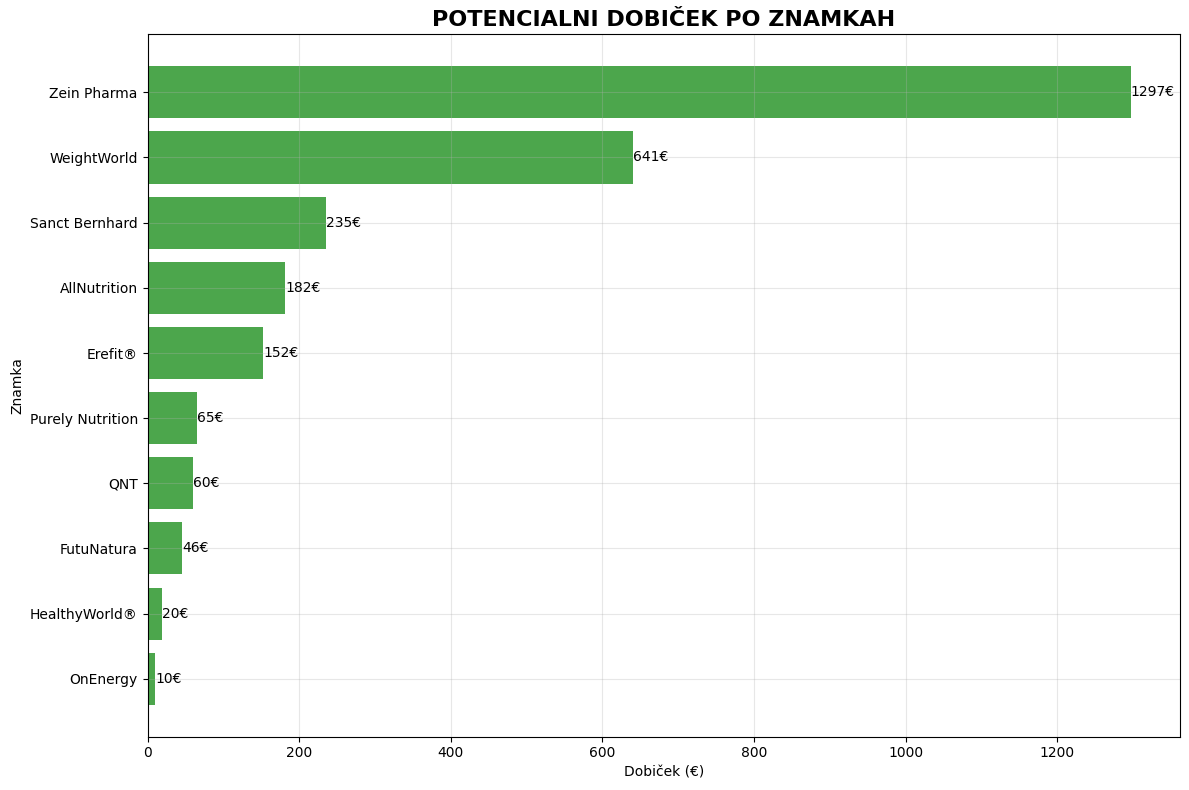

In [6]:
vsi_podatki = pd.read_csv('podatki_o_vseh_izdelki.csv')
vsi_podatki = vsi_podatki.dropna(subset=['Popust'])
vsi_podatki['Cena_očiščena'] = vsi_podatki['Cena'].str.replace(' €', '').astype(float)
vsi_podatki['Originalna_cena_očiščena'] = vsi_podatki['Originalna cena'].str.replace(' €', '').astype(float)

potencialni_dobicek = vsi_podatki.groupby('Znamka').agg({
    'Originalna_cena_očiščena': 'sum',
    'Cena_očiščena': 'sum'
}).round(2)

potencialni_dobicek['Dobicek'] = potencialni_dobicek['Originalna_cena_očiščena'] - potencialni_dobicek['Cena_očiščena']
ponudniki_z_najvecjim_potencialom = potencialni_dobicek.sort_values(by='Dobicek', ascending=False).head(10)
print("POTENCIALNI DOBIČEK PO ZNAMKAH:")
for ime in ponudniki_z_najvecjim_potencialom.index:
    dobicek = ponudniki_z_najvecjim_potencialom.loc[ime, 'Dobicek']
    print(f"{ime}: {dobicek:.2f}€")

plt.figure(figsize=(12, 8))
bars = plt.barh(range(len(ponudniki_z_najvecjim_potencialom)), 
                ponudniki_z_najvecjim_potencialom['Dobicek'].sort_values(ascending=True).values, 
                color='green', alpha=0.7)
plt.title('POTENCIALNI DOBIČEK PO ZNAMKAH', fontsize=16, fontweight='bold')
plt.xlabel('Dobiček (€)')
plt.ylabel('Znamka')
plt.yticks(range(len(ponudniki_z_najvecjim_potencialom)), 
           ponudniki_z_najvecjim_potencialom['Dobicek'].sort_values(ascending=False).index)

# Dodaj vrednosti na stolpce
plt.bar_label(bars, fmt='%.0f€')

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Ker tudi samo uporabljam nekaj športnih prehranskih dodatkov sem se odločila da za dva preverim kakšno ponudbo imata na spletni strani futunatura. Zanimalo me je koliko različnih takih izdelkov je na voljo in kašen je cenovni razpon le teh. Za analizo sem si izbrala prehranski dodatek magnezija in pa izotonične oz. elektrolitske napitke. Podatke ki jih imam sem najprej filtrirala samo na vrstice ki vsebujejo besedo magnezij v imenu, nato pa se na vrstice ki vsebujejo besede elektroliti, izotonični, elektrolistki v svojem imenu. na na dobljenem naboru podatkov sem nato pripravila nekaj analiz. Najprej sem samo izpisala število vseh najdenih izdelkov z magnezijem oziroma z elektroliti in jih nekaj tudi poimensko izpisala da vidim če sem originalne podatke pravilno razdelila na dve podmnožici. Kot se izkaže je na na spletni strani na voljo kar nekaj več izdelkov z magnezijem kot z elektroliti. Izdelkov z magnezijem je na voljo 98 z elektroliti pa 34 (Pri tem moramo upoštevati da se kateri izdelki iz originalnih podatkov izpustijo če v imenu uporabljajo kakšno drugo ključno besedo kot to po kateri iščemo mi, vendar gre vseeno za izdelek z magnezijem ali pa z elektroliti). Iz izpisa imen izdelkov pa lahko vidimo da moje filtriranje na podmnožice v osnovi deluje pravilno in so podatki v št_izdelkov_z_magnezijem in št_izdelkov_z_elektroliti pripravljeni za nadaljno obdelavo.

In [20]:
podatki = pd.read_csv('podatki_o_vseh_izdelki.csv')
izdelki_z_magnezijem = podatki[podatki['Ime'].str.contains('magnezij|magnezijev', case=False)]
izdelki_z_elektroliti = podatki[podatki['Ime'].str.contains('elektroliti|izotonični|elektrolitski', case=False)]
izdelki_z_magnezijem = izdelki_z_magnezijem.copy()
izdelki_z_elektroliti = izdelki_z_elektroliti.copy()

št_izdelkov_z_magnezijem = len(izdelki_z_magnezijem)
št_izdelkov_z_elektroliti = len(izdelki_z_elektroliti)

print(f"Število izdelkov z magnezijem: {št_izdelkov_z_magnezijem}")
print(f"Število izdelkov z elektroliti: {št_izdelkov_z_elektroliti}")
print()

print("=== IZDELKI Z MAGNEZIJEM ===")
for ime in izdelki_z_magnezijem['Ime'].head(10):
    print(f"{ime}")

print("\n=== IZDELKI Z ELEKTROLITI ===")
for ime in izdelki_z_elektroliti['Ime'].head(10):
    print(f"{ime}")




Število izdelkov z magnezijem: 98
Število izdelkov z elektroliti: 34

=== IZDELKI Z MAGNEZIJEM ===
ZMA Sport – cink + magnezij + vitamin B6
Magnezij 400 SUPRA
3x Magnezijev kelat 375 mg
Magnezij kompleks
3x Magnezij kompleks
ZMA – magnezij + cink + vitamin B6
Magnezijev bisglicinat
Magnezij + vitamini
Magnezijeva športna kopel z MSM
3x Magnezij + Kalcijev L-Treonat

=== IZDELKI Z ELEKTROLITI ===
Electrovit shot – napitek z elektroliti
Pro+ izotonični napitek – grenivka
Izotonični napitek z okusom pomaranče
Izotonični napitek – limeta
Pro+ izotonični napitek – limona
Elektroliti – šumeče tablete
Elektroliti – prah za pripravo napitka
3x Elektroliti – šumeče tablete
Elektroliti v prahu – limeta
3x Elektroliti – šumeče tablete


Sedaj, ko sem podatke uspešno razdelila na dve podmnožici sem se odločila da za vsako kategorijo analiziram cenovni razpon cen znotraj posamezne kategorije. Kot se izkaže so izdelki z magnezijem v povprečju dražji kot izdelki z elektroliti, prav tako pa je cenovni razpon pri magneziju večji. Magnezij je v povprečju 81% dražji. Magnezij ima večji standardni odklon (13.40€), kar pomeni, da so cene bolj razpršene - obstajajo tako zelo poceni kot zelo dragi izdelki, elektroliti pa imajo manjši standardni odklon (9.33€), kar pomeni, da so cene bolj enotne in predvidljive. 

In [17]:
print("=== STATISTIKE CEN ===")
print("\nMAGNEZIJ:")
print(f"Minimalna cena: {izdelki_z_magnezijem['Cena'].str.replace(' €', '').astype(float).min():.2f}€")
print(f"Maksimalna cena: {izdelki_z_magnezijem['Cena'].str.replace(' €', '').astype(float).max():.2f}€")
print(f"Povprečna cena: {izdelki_z_magnezijem['Cena'].str.replace(' €', '').astype(float).mean():.2f}€")
print(f"Mediana: {izdelki_z_magnezijem['Cena'].str.replace(' €', '').astype(float).median():.2f}€")
print(f"Standardni odklon: {izdelki_z_magnezijem['Cena'].str.replace(' €', '').astype(float).std():.2f}€")

print("\nELEKTROLITI:")
print(f"Minimalna cena: {izdelki_z_elektroliti['Cena'].str.replace(' €', '').astype(float).min():.2f}€")
print(f"Maksimalna cena: {izdelki_z_elektroliti['Cena'].str.replace(' €', '').astype(float).max():.2f}€")
print(f"Povprečna cena: {izdelki_z_elektroliti['Cena'].str.replace(' €', '').astype(float).mean():.2f}€")
print(f"Mediana: {izdelki_z_elektroliti['Cena'].str.replace(' €', '').astype(float).median():.2f}€")
print(f"Standardni odklon: {izdelki_z_elektroliti['Cena'].str.replace(' €', '').astype(float).std():.2f}€")

=== STATISTIKE CEN ===

MAGNEZIJ:
Minimalna cena: 1.99€
Maksimalna cena: 53.99€
Povprečna cena: 19.95€
Mediana: 16.49€
Standardni odklon: 13.40€

ELEKTROLITI:
Minimalna cena: 0.49€
Maksimalna cena: 35.99€
Povprečna cena: 11.00€
Mediana: 8.49€
Standardni odklon: 9.33€


Cenovni razpon posamezne kategorije (Izdelki z magnezijem, izdelki z elektroliti) sem prikazala še s pomočjo box plot vizualizacij ki jih lahko vidimo spodaj

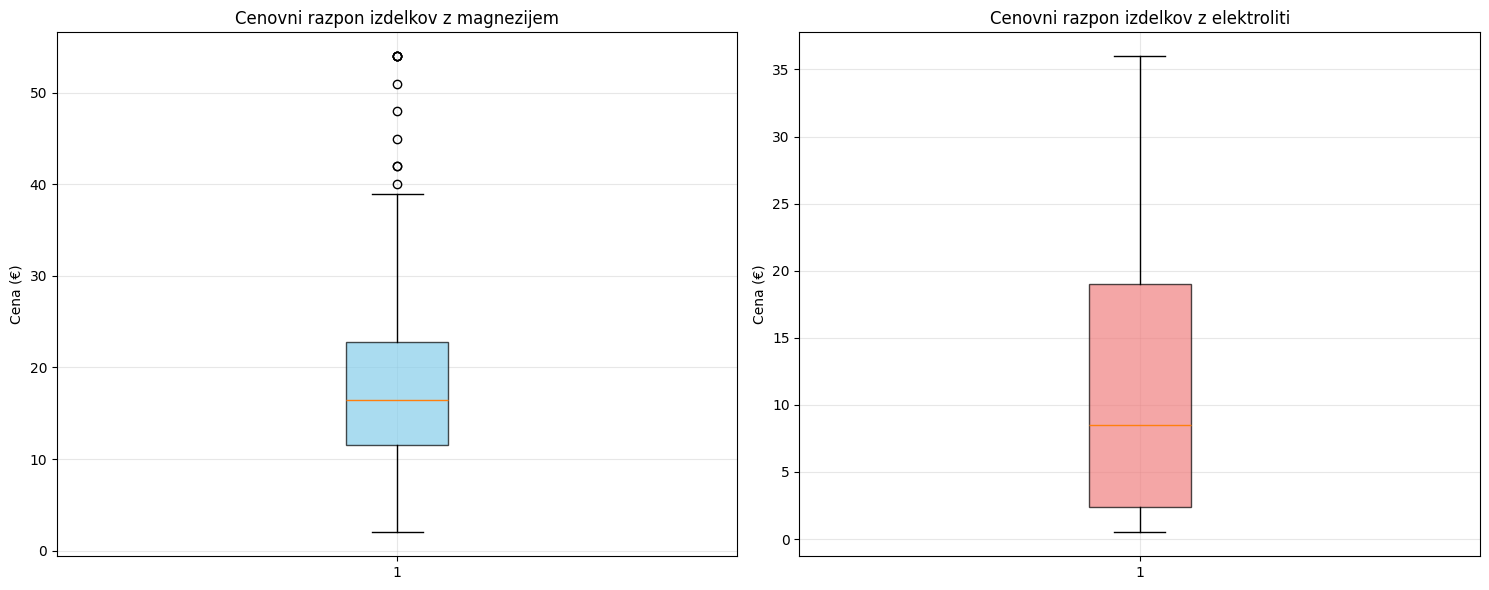

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

izdelki_z_magnezijem['Cena_numeric'] = izdelki_z_magnezijem['Cena'].str.replace(' €', '').astype(float)
izdelki_z_elektroliti['Cena_numeric'] = izdelki_z_elektroliti['Cena'].str.replace(' €', '').astype(float)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Box plot za magnezij
ax1.boxplot(izdelki_z_magnezijem['Cena_numeric'], patch_artist=True, 
           boxprops=dict(facecolor='skyblue', alpha=0.7))
ax1.set_title('Cenovni razpon izdelkov z magnezijem')
ax1.set_ylabel('Cena (€)')
ax1.grid(True, alpha=0.3)

# Box plot za elektrolite
ax2.boxplot(izdelki_z_elektroliti['Cena_numeric'], patch_artist=True,
           boxprops=dict(facecolor='lightcoral', alpha=0.7))
ax2.set_title('Cenovni razpon izdelkov z elektroliti')
ax2.set_ylabel('Cena (€)')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Za konec sem se odločila še za izračun korelacije med ceno in količino. Pri tem sem se osredotočila samo na izdelke kjer je količina podana v gramih za lažji izračun. Zanimalo me je kako je cena izdelka odvisna od količine samega izdelka.  za izračun sem uporabila model linearne regresije. predvidevala sem da cena izdelka pozitivno korelira s količino izdelka. V analizo mi je uspelo vključiti 196 podatkov. Ugotovila sem da je korelacija med količino izdelka in njegovo ceno zmerna in pozitivna kar pomeni da če se povečuje količina izdelka se zmerno povečuje tudi njegova cena, kar smo na začetku tudi predvideli. Rezultat primerjanja cena in količine izdelka je naše ugotovitve samo potrdil.

REZULTATI ANALIZE
Število izdelkov v analizi: 196
Korelacijski koeficient (Pearson): 0.647

INTERPRETACIJA
Povezava med količino in ceno je zmerna in pozitivna.



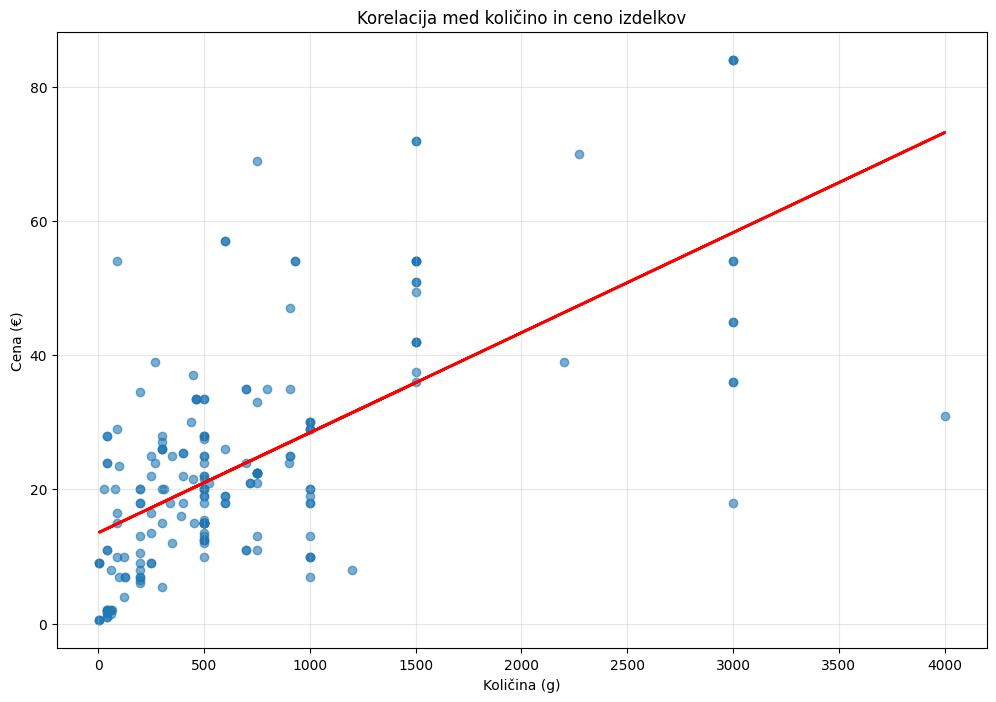

In [31]:
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import numpy as np
import re

podatki = podatki.dropna(subset=['Količina'])
podatki = podatki[podatki['Količina'].str.contains('g', case=False)]

def izloci_kolicino(kolicina):
    kolicina = str(kolicina)
    match = re.search(r'(\d+(?:\s+\d+)*)\s*g', kolicina)
    if match:
        stevilo = match.group(1).split()[0]
        return int(stevilo)
    return 0


podatki['Količina_numeric'] = podatki['Količina'].apply(izloci_kolicino)
podatki = podatki[podatki['Količina_numeric'] > 0]
podatki['Cena_numeric'] = podatki['Cena'].str.replace(' €', '').astype(float)

x = podatki['Količina_numeric'].values.reshape(-1, 1)
y = podatki['Cena_numeric']

model = LinearRegression()
model.fit(x, y)
y_napoved = model.predict(x)

plt.figure(figsize=(12, 8))
plt.scatter(podatki['Količina_numeric'], podatki['Cena_numeric'], alpha=0.6)
plt.plot(podatki['Količina_numeric'], y_napoved, color='red', linewidth=2)
plt.xlabel('Količina (g)')
plt.ylabel('Cena (€)')
plt.title('Korelacija med količino in ceno izdelkov')
plt.grid(True, alpha=0.3)

korelacija, p_vrednost = pearsonr(podatki['Količina_numeric'], podatki['Cena_numeric'])

print("REZULTATI ANALIZE")
print(f"Število izdelkov v analizi: {len(podatki)}")
print(f"Korelacijski koeficient (Pearson): {korelacija:.3f}")
print()

if abs(korelacija) >= 0.7:
    moc = "močna"
elif abs(korelacija) >= 0.5:
    moc = "zmerna"
elif abs(korelacija) >= 0.3:
    moc = "šibka"
else:
    moc = "zelo šibka"

if korelacija > 0:
    smer = "pozitivna"
else:
    smer = "negativna"

print("INTERPRETACIJA")
print(f"Povezava med količino in ceno je {moc} in {smer}.")
print()

Z analizo sem na tej točki končala. Ugotovila sem kar nekaj zanimivih stvari o izdelkih ki so ponujeni na spletni strani Futunatura. Ker sem uporabljala knjižnice kot so pandas, matplotlib, numpy,... je bilo moje delo precej tekoče. Lahko sem pripravila zanimive analize brez pretirane količine kode, prav tako pa sem lahko rezultate predstavila na zanimiv način s pomočjo različnih vizualizacij. Upam da se vam je zdela moja analiza zanimiva, če pa bi imel kdo željo nadaljevati z njo in jo dopolniti pa ima seveda še veliko prostora za nove zanimive ugotovitve.